<a href="https://colab.research.google.com/github/LeemojiReddy/Newchic/blob/main/orcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#srihari workspace

#**Project Name** - Online Retail Customer Segmentation

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

# **Summary:**

I recieved a data frame with following features(columns):


InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

The cx of any retain company falls under different category and sub groups. Those groups can be based on country, time of purchase, types of purchase, total purchase and so on. Segementating them into multiple groups using ML models helps the company for better service, keeping good and old cx happy and targeted advertisment, etc.

I started my project with dropping null values, as there was no good way to replace them. I also stripped date, month, time, etc. in different column for better analysis. I also made a new feature of total cost a cx spend.
Further, I analysed which countries have highest number of cx, months with high orders, products that gets most demand, etc. I also made graph to have a clear visulization.

I also noticed a number of cx cancelled the order, I dropped cx with negative total cost before modelling. The company is ideally suggested to look into why some cx cancelled orders.

I did the RFM modelling, thus analysed the cx on basis of Recency, Frequency, Monetary Value. In the last part I used different ML models to cluster data into different groups. According  to models, following are the ideal number of clusters to be divided.

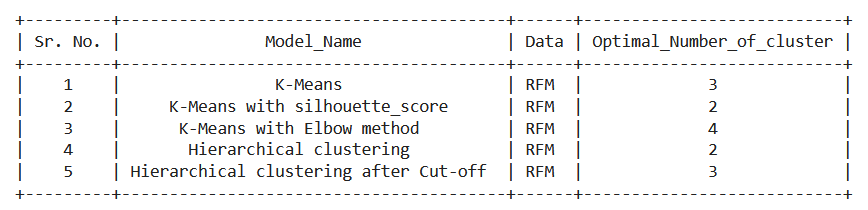

# **GitHub Link -**

https://github.com/akashkivani/almabetter-Online-Retail-Customer-Segmentation-Project/blob/main/ML_unsupervised_submission.ipynb

# **Problem Statement**


In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

#Leemoji workspace

##***1. Know Your Data***

###***importing libraries***

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from prettytable import PrettyTable

###***Dataset Loading***

In [10]:
#LOAD DATASET
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_excel('/content/drive/My Drive/Online Retail Customer Segmantation Dataset.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

###Dataset Information

In [5]:
# Dataset Info
df.info()
df.describe()

NameError: ignored

####Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

df.duplicated().sum()

5268

####Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

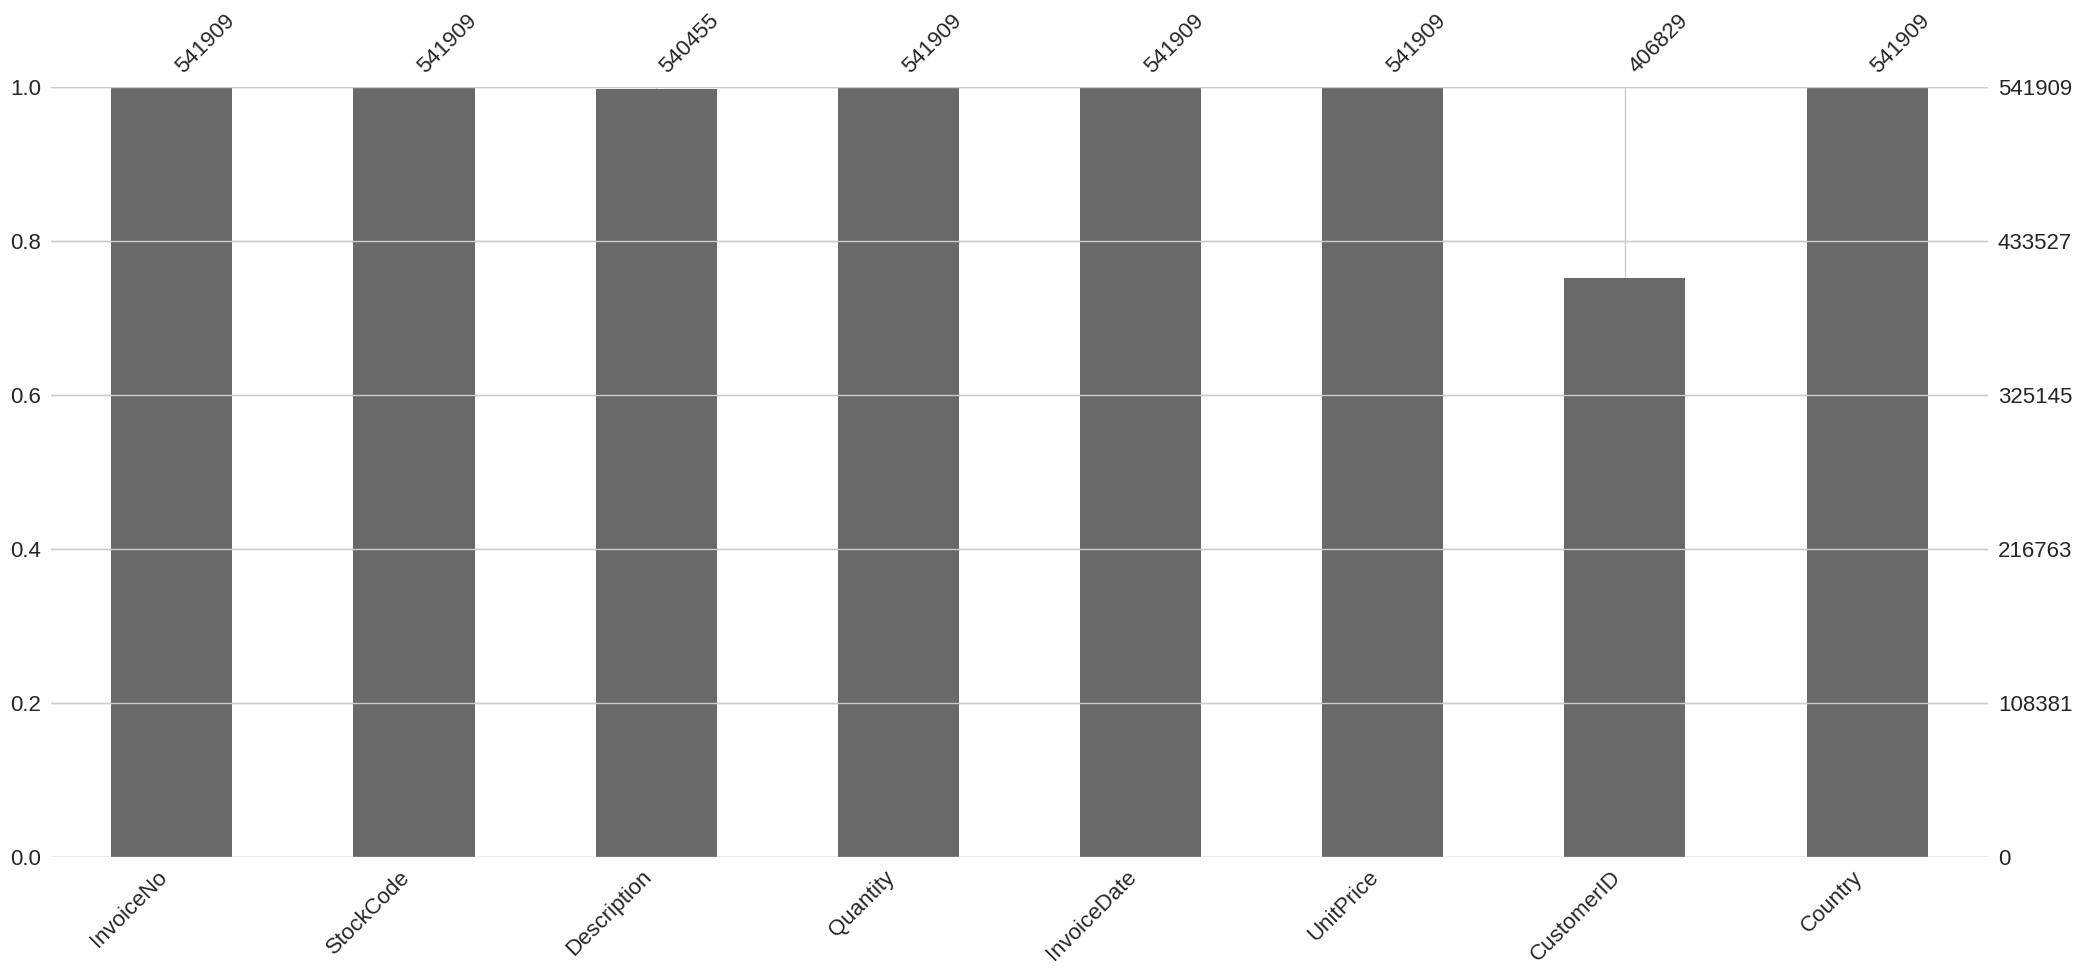

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)

###What did you know about your dataset?

The data set contains information of different online customer, including invoice number, stock code, quantity, etc. (details in section below).

Out dataframe have 5268 duplicates, and a number of NAN in 2 columns: discription has 1454 and customer id has 135080 (shown in graph above).

##***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# ***Sirisha workspace****

In [ ]:
num_features= list(df.select_dtypes(['int64','float64']))
print(num_features)


['Quantity', 'UnitPrice', 'CustomerID']


# Triveni workspace